In [359]:
import requests
import seaborn as sns


In [360]:
api_key="RGAPI-de7fc83d-d5d9-4671-8b57-66976e50afb8"

In [361]:
api_url= "api_key="+api_key

# Request usada para pegar as informações da partida

In [362]:
request = requests.get("https://americas.api.riotgames.com/lol/match/v5/matches/BR1_2966455056/timeline?"+api_url)

In [363]:
print(request.content)

b'{"metadata":{"dataVersion":"2","matchId":"BR1_2966455056","participants":["Uo-BjRKlWYWFdSGQyy2eV2nbgliOx_N4DxC58ncr6benG8OigrwayLyGpEZcxzvFt7fxKp-M13PD1Q","M7pcSL0Vka3DztC39ON3N_UvJLIOfH8ZG3JvGt_wQf3Fws1YJ2U88SZOIzK4Xr7hENSpqPjrps2eVA","1FFibPVv9eXzmijYACp1hpTaugFUKxqhGc6R90PkbYb7lj1onlYOTS-pKO775qOCoEDhrScNbj_--Q","iFc59NCGWKUiYF50Z807ncp_CLUQkV5RcjVR8a5kLEcLskzMxUquA6y29YgJhqp_Xj_pkmRNlTgzMw","uP6PT9Z6Kp5cQAk9gkPp90G1Iv-xr8mePSTpssBbVyirBGZTyinkS61DHly2k0fge-mu1eb-jEsQJg","zQo85_QlmMydFObQcfMnd5XPBxjKo-lT7pYNVsDDq562c82ZCnZy0lxdrVCPFI_5oMKCCCq_cogRCQ","SJpLynGx9eTP1K2GVTcC55g2PbA23l6yaDWekb44_0vL4MPjP2G7zJEHL2q9f66IGO4YQtiCV0IlPA","A7ff_jOsSH7GGUKuIDxQbsWeP2yYgnT2JLI7Z_6yGRMCDc85V3cRjSlAYNv36-85MD_s5Y1JDJZM4Q","rhzOhzm0sjwAhjB0Mj_W1DQcI38ujE1w8kW7GjMLw4XNIKFwEBtt5a4-fbULTSfHIBZPhEdodDJAbw","GmjqZtf-QmcFePLaJG4eKv-LFtv7chjZW6VoOUfminCi1sm5pKZgwJ79oGPd_xPcw9biC40hMRXv3A"]},"info":{"endOfGameResult":"GameComplete","frameInterval":60000,"frames":[{"events":[{"realTimestamp":17214388472

#aqui nos pegamos a nossa request e transformamos ela em um dicionario

In [364]:
response = request.json()
print(type(response))

<class 'dict'>


In [365]:
print(response.keys())
print(response['info'].keys())

dict_keys(['metadata', 'info'])
dict_keys(['endOfGameResult', 'frameInterval', 'frames', 'gameId', 'participants'])


# quantidade 'frames' da posição dos jogadores que nos temos

In [366]:
len(response['info']['frames'])

42

# caminho para pegar a posição do player 1

In [367]:
response['info']['frames'][0]['participantFrames']['1']['position']

{'x': 554, 'y': 581}

# mas porque o player 1?

olhando o nosso dicionario response notei que nele havia o numero de mobs da jg que cada player abateu e nele vi quem abateu mais monstros da jg assim descobri quem eram os jg no caso sendo o player 1 e 7

In [368]:
print(response['info']['frames'][41]['participantFrames']['1']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['2']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['3']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['4']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['5']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['6']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['7']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['8']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['9']['jungleMinionsKilled'],
      response['info']['frames'][41]['participantFrames']['10']['jungleMinionsKilled'])

206 76 10 4 16 3 107 16 13 0


In [369]:
frames = response['info']['frames']

In [370]:
pos_JG_blue_x=[]
pos_JG_Blue_y=[]

# armazenamos em listas todas as posições x e y do jg azul

In [371]:
for i in range(len(frames)):
  pos_JG_blue_x.append(frames[i]['participantFrames']['1']['position']['x'])
  pos_JG_Blue_y.append(frames[i]['participantFrames']['1']['position']['y'])

In [372]:
print(pos_JG_blue_x,pos_JG_Blue_y)
print(len(pos_JG_blue_x),len(pos_JG_Blue_y))

[554, 6639, 7934, 3460, 4511, 8368, 7104, 7151, 7272, 3902, 10327, 11438, 6730, 3748, 8176, 3973, 4932, 7160, 10994, 11702, 7354, 13322, 11836, 9691, 3358, 5426, 7077, 8586, 5719, 5016, 6973, 4716, 11364, 11568, 9399, 9351, 7739, 7829, 10868, 2690, 6486, 6486] [581, 4494, 2312, 7837, 9144, 2387, 8712, 8798, 3503, 7936, 2718, 6516, 6501, 6331, 3527, 7538, 10158, 9272, 4065, 4151, 7685, 6950, 4904, 4599, 7735, 5501, 6716, 4650, 5994, 5089, 4501, 10398, 14188, 13670, 8461, 8581, 13543, 10006, 10274, 4305, 4603, 4603]
42 42


In [373]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [374]:
img = Image.open('/content/Figura-2-Mapa-da-Summoners-Rift-Fonte-Techtudo-15_Q320.jpg')
img = np.array(img)

# grafico com a posição do jungle do time azul

In [375]:
def mapeador_de_posicao_50x50(matriz):
  matriz_50x50 = np.zeros((50, 50))
  for i, (x, y) in enumerate(matriz):
    elemento1 = x // 320
    elemento2 = y // 320
    matriz_50x50[elemento1, elemento2] = matriz_50x50[elemento1, elemento2] + 1
  return matriz_50x50


In [376]:
matriz_posicao = np.column_stack((pos_JG_blue_x, pos_JG_Blue_y))

In [377]:
matriz_heatmap=mapeador_de_posicao_50x50(matriz_posicao)

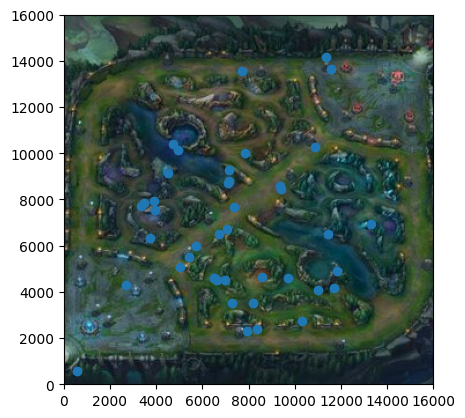

In [378]:
fig, ax = plt.subplots()

ax.imshow(img, extent=[0, 16000, 0, 16000])
ax.plot(pos_JG_blue_x,pos_JG_Blue_y, 'o')
plt.show()

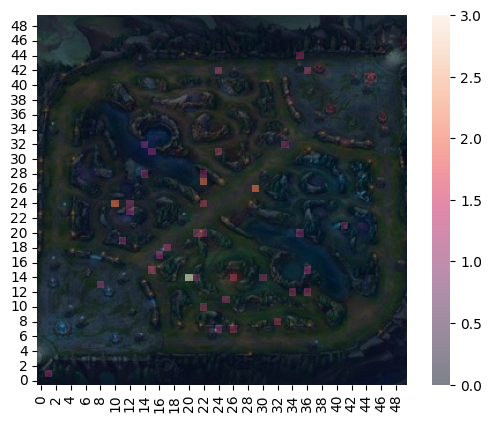

In [379]:
fig, ax = plt.subplots()
sns.heatmap(matriz_heatmap.T, alpha=0.5) #nota-se que tem de usar o método .T para realizar transposição da nossa matriz heatmap
ax.invert_yaxis()
ax.imshow(img, extent=[0, 50, 0, 50])
plt.show()

# grafico com a posição do jungle do time vermelho

In [380]:
pos_JG_red_x=[]
pos_JG_red_y=[]

In [381]:
for i in range(len(frames)):
  pos_JG_red_x.append(frames[i]['participantFrames']['7']['position']['x'])
  pos_JG_red_y.append(frames[i]['participantFrames']['7']['position']['y'])

In [382]:
matriz_posicao = np.column_stack((pos_JG_red_x, pos_JG_red_y))

In [383]:
matriz_heatmap=mapeador_de_posicao_50x50(matriz_posicao)

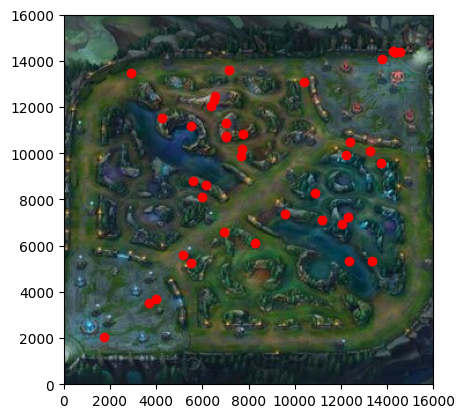

In [384]:
fig, ax = plt.subplots()

ax.imshow(img, extent=[0, 16000, 0, 16000])
ax.plot(pos_JG_red_x,pos_JG_red_y, 'o', color='red')
plt.show()

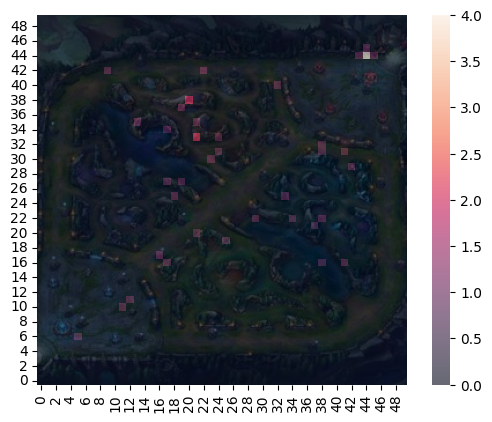

In [385]:
fig, ax = plt.subplots()
sns.heatmap(matriz_heatmap.T, alpha=0.6) #nota-se que tem de usar o método .T para realizar transposição da nossa matriz heatmap
ax.invert_yaxis()
ax.imshow(img, extent=[0, 50, 0, 50])
plt.show()